<a href="https://colab.research.google.com/github/Aloxxa/r_public/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_A1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [ ]:
!gdown --id 1Aj73jKNIChtAASjYFZyjhyQib-SUiV4n

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Aj73jKNIChtAASjYFZyjhyQib-SUiV4n
To: /content/Задания_1_2.xlsx
100% 7.26M/7.26M [00:00<00:00, 8.71MB/s]


In [ ]:
data = pd.read_excel('/content/Задания_1_2.xlsx', sheet_name='Timeseries')

In [ ]:
df = data.copy()
df.head()

,Date,series1
0,2015-01-01,1006.699649
1,2015-01-02,3197.751826
2,2015-01-03,3217.491035
3,2015-01-04,2151.573759
4,2015-01-05,4243.929892


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,series1
Date,
2015-01-01,1006.699649
2015-01-02,3197.751826
2015-01-03,3217.491035
2015-01-04,2151.573759
2015-01-05,4243.929892


<Axes: xlabel='Date'>

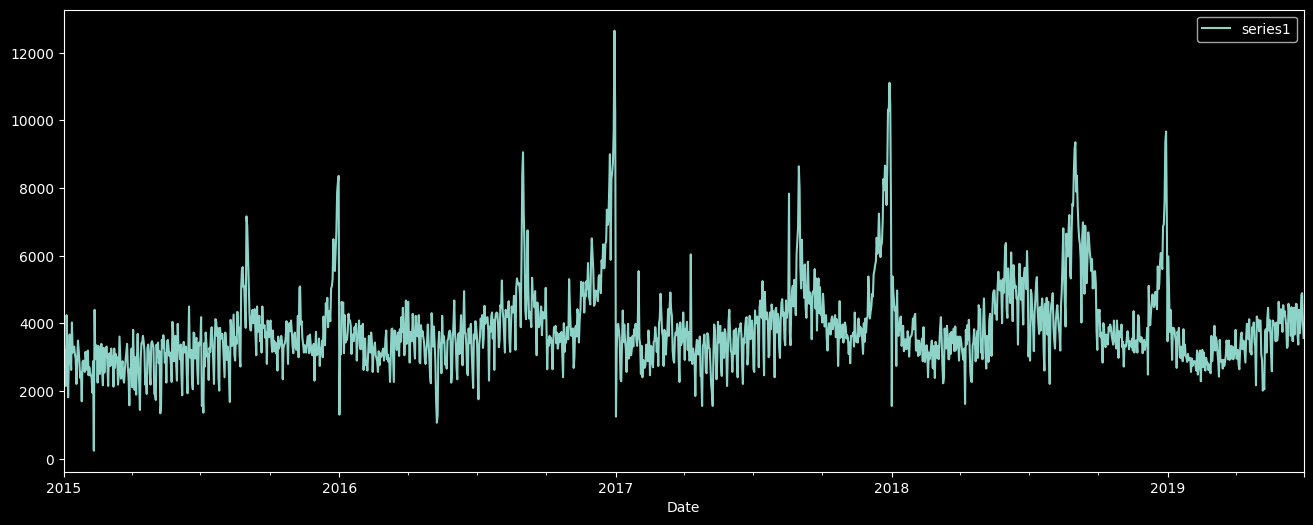

In [ ]:
df.plot(figsize=(16,6))

<Axes: xlabel='Date'>

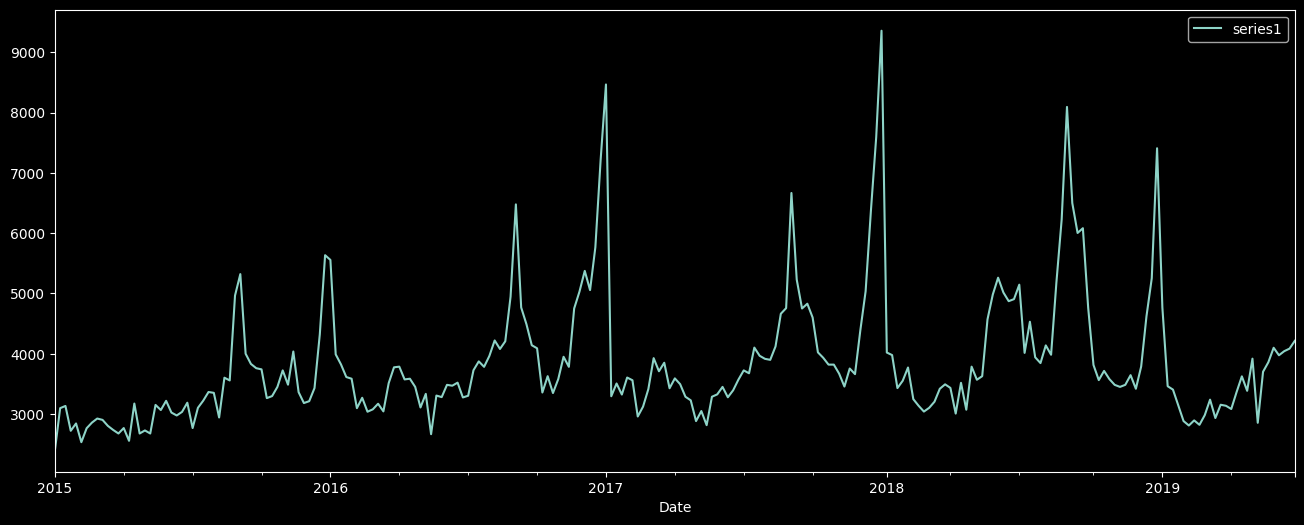

In [ ]:
t = df.resample('W').mean()
t.plot(figsize=(16,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

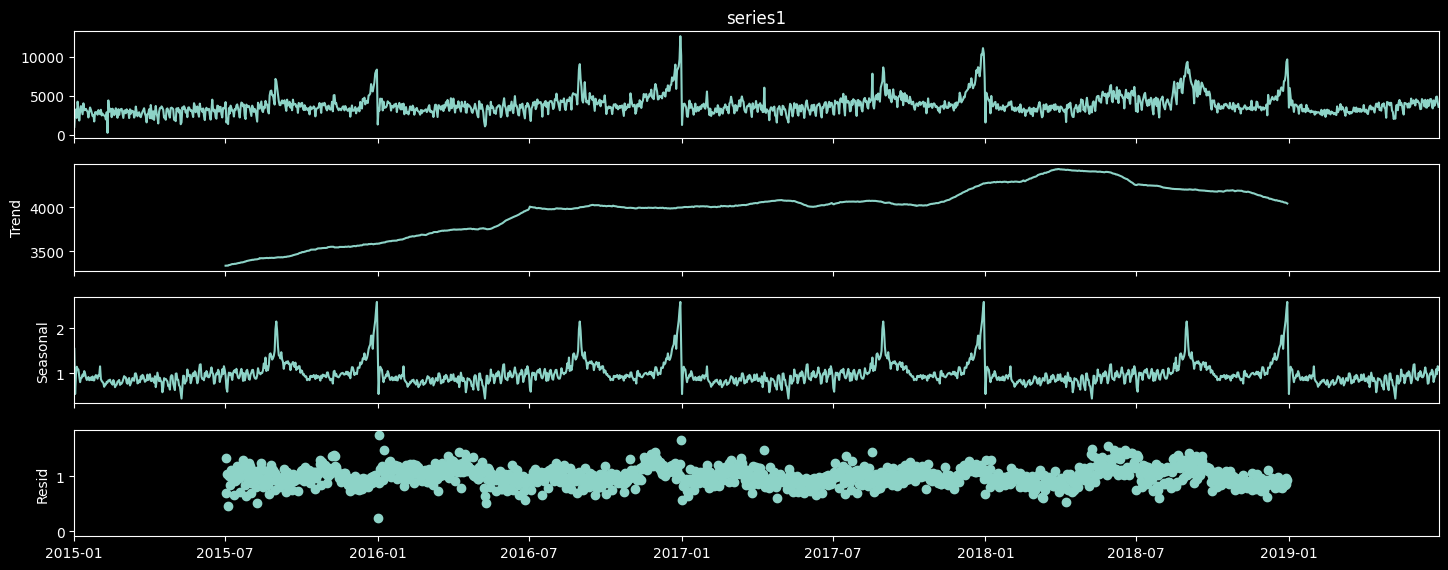

In [ ]:
decomposition = seasonal_decompose(df['series1'], model='multiplicative', period=365)
decomposition.plot().set_size_inches((16, 6))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.series1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.496714
p-value: 0.000002


# ARIMA

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.5 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [ ]:
model = pm.auto_arima(df.series1, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=26570.762, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31939.088, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=26768.690, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=30155.081, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=3.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26470.780, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=29039.606, Time=1.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26469.355, Time=0.75 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=26473.844, Time=1.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=5.16 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=26468.935, Time=0.53 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=28562.758, Time=2.42 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=26442.878, Time=3.11 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=26801.550, Time=1.46 sec
 ARIMA(1,0,2)(0,0,0)[0] interce

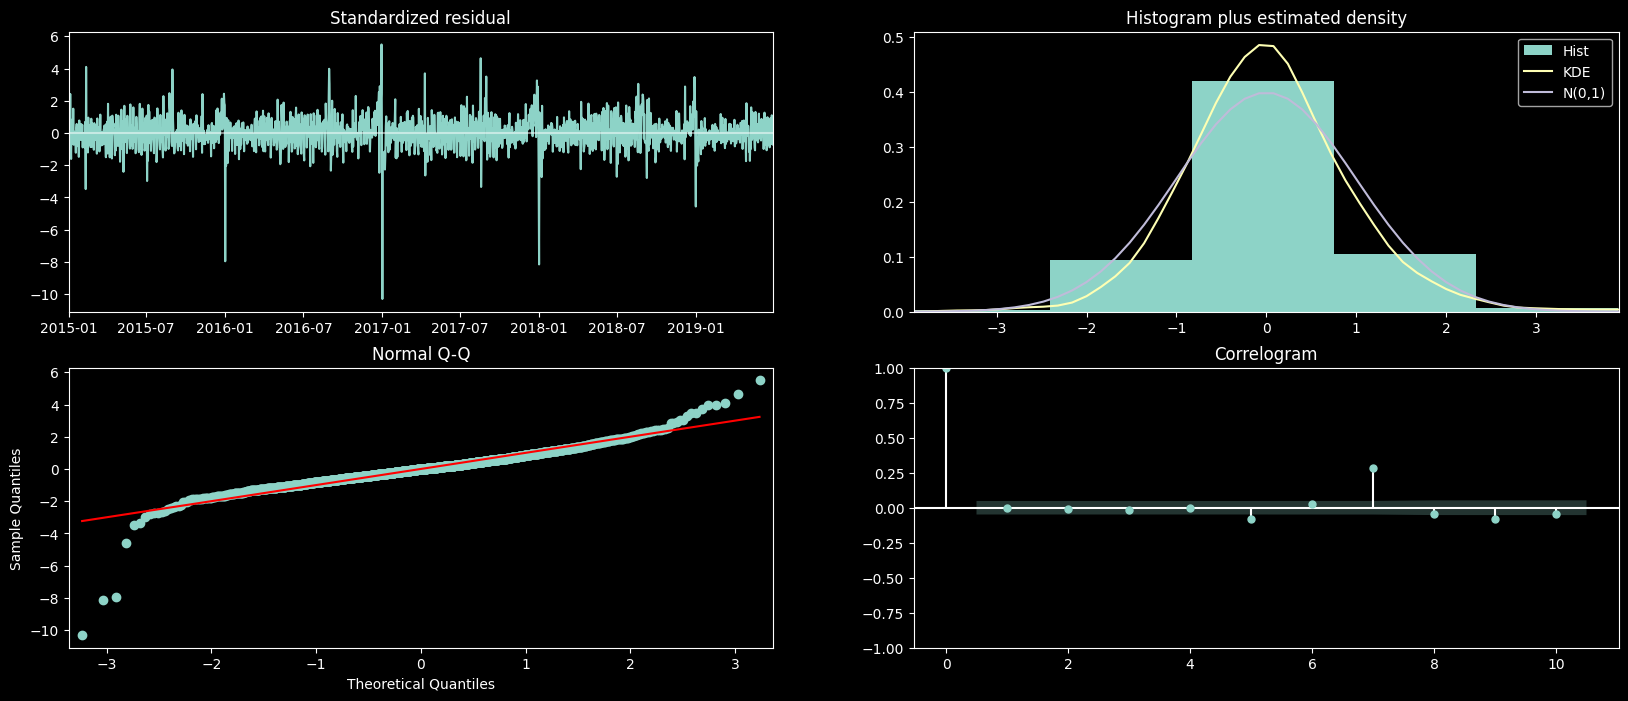

In [ ]:
model.plot_diagnostics(figsize=(20,8))
plt.show()

In [ ]:
train = df['series1'][:int(0.8 * len(df))]
test = df['series1'][int(0.8 * len(df)):]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train, order=(1, 0, 3))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast = model_fit.forecast(steps=len(test))
test.index = forecast.index

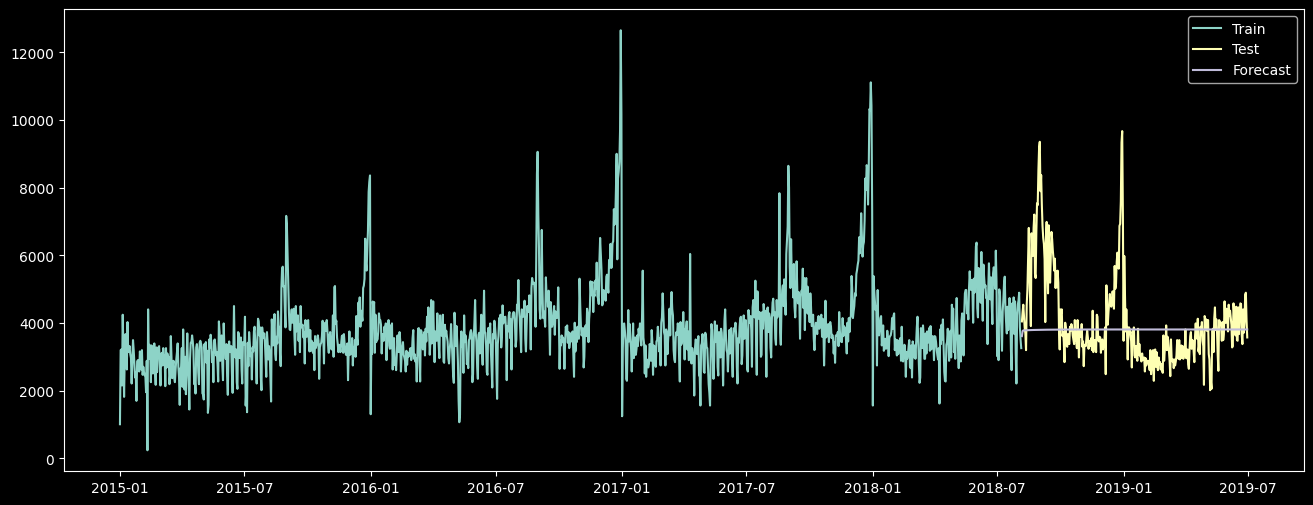

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

RMSE: 1351.7607111927762


# BiLSTM

In [ ]:
train_size = int(len(df) * 0.8)
dl_train, dl_test = df.iloc[:train_size], df.iloc[train_size:]
print(len(dl_train), len(dl_test))

1313 329


In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
target_transformer = MinMaxScaler()

In [ ]:
dl_train['series1'] = target_transformer.fit_transform(dl_train[['series1']])
dl_test['series1'] = target_transformer.transform(dl_test[['series1']])

<ipython-input-37-5e49fea3f9ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_train['series1'] = target_transformer.fit_transform(dl_train[['series1']])
<ipython-input-37-5e49fea3f9ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_test['series1'] = target_transformer.transform(dl_test[['series1']])


In [ ]:
sequence_length = 3
X_train, y_train = create_dataset(dl_train, dl_train['series1'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['series1'], sequence_length)

In [ ]:
!pip install tensorflow keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Build the bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1310/1310 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0113 - val_loss: 0.0032
Epoch 2/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0063 - val_loss: 0.0034
Epoch 3/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 4/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0053 - val_loss: 0.0030
Epoch 5/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0050 - val_loss: 0.0028
Epoch 6/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0045 - val_loss: 0.0033
Epoch 7/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 8/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0043 - val_loss: 0.0028
Epoch 9/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 10/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0046 - val_loss: 0.0028
Epoch 11/30
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0047 - val_loss: 0.0029
Epoch 12/30
1310/1310 ━━━━━━━━━━━━━━

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (1, 200)                    │          81,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 1)                      │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 245,405 (958.62 KB)

 Trainable params: 81,801 (319.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 163,604 (639.08 KB)

In [ ]:
# Make predictions
bilstm_pred = model.predict(X_test)
bilstm_pred = target_transformer.inverse_transform(bilstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


RMSE: 620.9953821706381


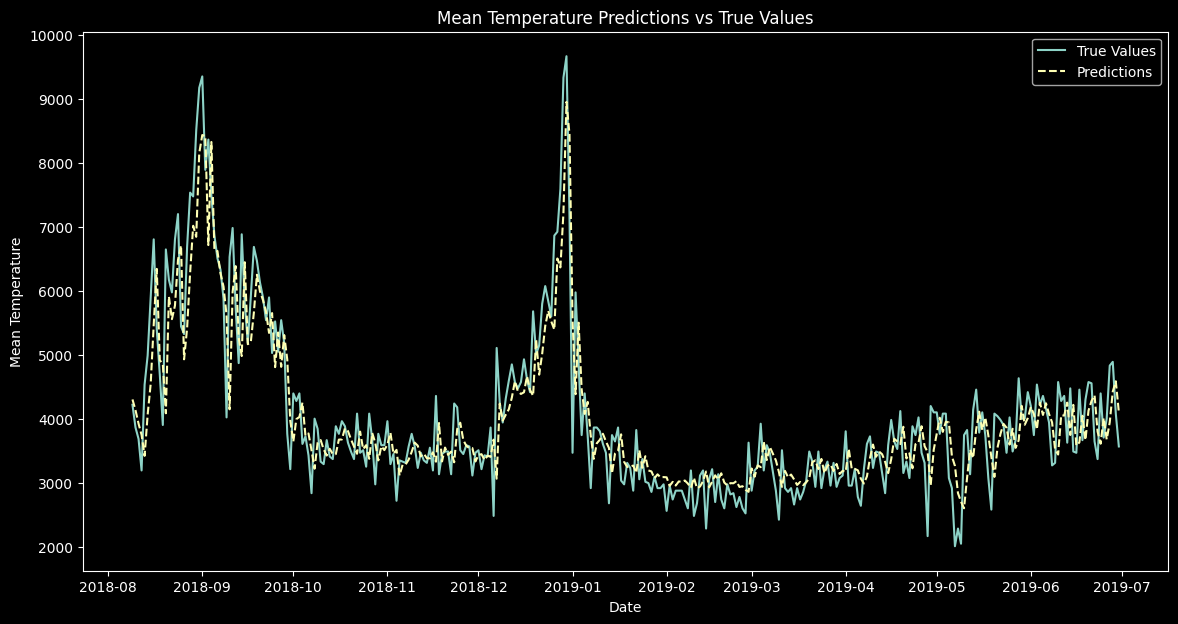

In [ ]:
# Calculate RMSE and R2 scores
rmse = np.sqrt(mean_squared_error(y_test, bilstm_pred))

print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], bilstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Predictions vs True Values')
plt.legend()
plt.show()

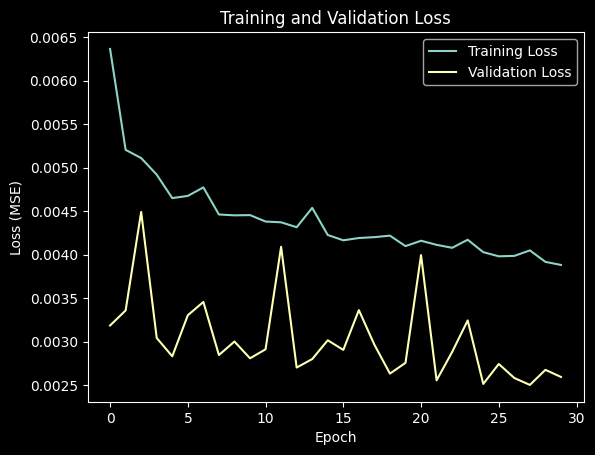

In [ ]:
# Get training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()